### PROBLEM STATEMENT 

Suppose that you are working as a data analyst at Airbnb. For the past few months, Airbnb has seen a major decline in revenue. Now that the restrictions have started lifting and people have started to travel more, Airbnb wants to make sure that it is fully prepared for this change.
The different leaders at Airbnb want to understand some important insights based on various attributes in the dataset so as to increase the revenue such as  '''
The different leaders at Airbnb want to understand some important insights 
based on various attributes in the dataset so as to increase the revenue, such as:
- Which type of hosts to acquire more and weher?
- The categorisation of customers based on their prefeeenc-s.
- What are the neighbourhoods they need to target?
- What is the pricing ranges preferred by customers?
- The various kinds of properties that exist with respect to customer preferences.
- Adjustments in the existing properties to make it more customer-oriented.
- What are the most popular localities and properties in New York currently?
- How to get unpopular properties more traction? and so on...
'''


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# remove warnings
import warnings
warnings.filterwarnings("ignore")

### Reading and understanding the data 

In [6]:
df= pd.read_csv("AB_NYC_2019.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0


In [7]:
df.columns = df.columns.str.capitalize()
df.head()

,Id,Name,Host_id,Host_name,Neighbourhood_group,Neighbourhood,Latitude,Longitude,Room_type,Price,Minimum_nights,Number_of_reviews,Last_review,Reviews_per_month,Calculated_host_listings_count,Availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Id                              48895 non-null  int64  
 1   Name                            48879 non-null  object 
 2   Host_id                         48895 non-null  int64  
 3   Host_name                       48874 non-null  object 
 4   Neighbourhood_group             48895 non-null  object 
 5   Neighbourhood                   48895 non-null  object 
 6   Latitude                        48895 non-null  float64
 7   Longitude                       48895 non-null  float64
 8   Room_type                       48895 non-null  object 
 9   Price                           48895 non-null  int64  
 10  Minimum_nights                  48895 non-null  int64  
 11  Number_of_reviews               48895 non-null  int64  
 12  Last_review                     

##### we have mix of numeric and categorical data and few of them are missing and dtype of last review seems to be incoorect

### Inspecting the data 

In [11]:
df.shape #we have 48895 rows and 16 columns

(48895, 16)

In [12]:
df.describe() # to get statistical summary of mumeric data

,Id,Host_id,Latitude,Longitude,Price,Minimum_nights,Number_of_reviews,Reviews_per_month,Calculated_host_listings_count,Availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [13]:
df.describe(include=['object']) #for categorical columns

,Name,Host_name,Neighbourhood_group,Neighbourhood,Room_type,Last_review
count,48879,48874,48895,48895,48895,38843
unique,47896,11452,5,221,3,1764
top,Hillside Hotel,Michael,Manhattan,Williamsburg,Entire home/apt,23-06-2019
freq,18,417,21661,3920,25409,1413


In [14]:
# as last_review is not in correct format so it is being considered as categorical

In [15]:
df['Last_review'] = pd.to_datetime(df['Last_review'])

In [16]:
df.Host_name.nunique()

11452

In [17]:
df.describe(include=['object']) #for categorical columns

,Name,Host_name,Neighbourhood_group,Neighbourhood,Room_type
count,48879,48874,48895,48895,48895
unique,47896,11452,5,221,3
top,Hillside Hotel,Michael,Manhattan,Williamsburg,Entire home/apt
freq,18,417,21661,3920,25409


In [18]:
df.duplicated().sum() # checking duplicates


0

### Categorizing Column


In [20]:
df.Availability_365.value_counts()

Availability_365
0      17533
365     1295
364      491
1        408
89       361
       ...  
195       26
183       24
196       24
181       23
202       20
Name: count, Length: 366, dtype: int64

In [21]:
def Availability_365_categories_function(row):
    if row <= 50:
        return 'very Low'
    elif row <= 100:
        return 'Low'
    elif row <= 200 :
        return 'Medium'
    elif (row <= 300):
        return 'High'
    else:
        return 'very High'

In [22]:
df['Availability_365_categories'] = df.Availability_365.map(Availability_365_categories_function)
df['Availability_365_categories'].value_counts()

Availability_365_categories
very Low     24928
very High     8108
Medium        5792
High          5225
Low           4842
Name: count, dtype: int64

In [23]:
df.Price.value_counts()

Price
100    2051
150    2047
50     1534
60     1458
200    1401
       ... 
780       1
386       1
888       1
483       1
338       1
Name: count, Length: 674, dtype: int64

In [24]:
df.Price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: Price, dtype: float64

In [25]:
#even tough there is lot of difference in mean and max of price; howvever it cannot be considered as an outlier 
#because one accomodation can be cheaper and other can be expensive

In [26]:
df.Number_of_reviews.describe()

count    48895.000000
mean        23.274466
std         44.550582
min          0.000000
25%          1.000000
50%          5.000000
75%         24.000000
max        629.000000
Name: Number_of_reviews, dtype: float64

### Checking the count of missing values and handling those

##### cleaning the data

In [29]:
list=[df.columns]
list


[Index(['Id', 'Name', 'Host_id', 'Host_name', 'Neighbourhood_group',
        'Neighbourhood', 'Latitude', 'Longitude', 'Room_type', 'Price',
        'Minimum_nights', 'Number_of_reviews', 'Last_review',
        'Reviews_per_month', 'Calculated_host_listings_count',
        'Availability_365', 'Availability_365_categories'],
       dtype='object')]

In [30]:
df.isnull().sum()

Id                                    0
Name                                 16
Host_id                               0
Host_name                            21
Neighbourhood_group                   0
Neighbourhood                         0
Latitude                              0
Longitude                             0
Room_type                             0
Price                                 0
Minimum_nights                        0
Number_of_reviews                     0
Last_review                       10052
Reviews_per_month                 10052
Calculated_host_listings_count        0
Availability_365                      0
Availability_365_categories           0
dtype: int64

In [31]:
(df.isnull().sum()/len(df)*100).sort_values(ascending=False)

Reviews_per_month                 20.558339
Last_review                       20.558339
Host_name                          0.042949
Name                               0.032723
Id                                 0.000000
Minimum_nights                     0.000000
Availability_365                   0.000000
Calculated_host_listings_count     0.000000
Number_of_reviews                  0.000000
Room_type                          0.000000
Price                              0.000000
Longitude                          0.000000
Latitude                           0.000000
Neighbourhood                      0.000000
Neighbourhood_group                0.000000
Host_id                            0.000000
Availability_365_categories        0.000000
dtype: float64

In [32]:
df[df['Reviews_per_month'].isna()].head()

,Id,Name,Host_id,Host_name,Neighbourhood_group,Neighbourhood,Latitude,Longitude,Room_type,Price,Minimum_nights,Number_of_reviews,Last_review,Reviews_per_month,Calculated_host_listings_count,Availability_365,Availability_365_categories
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365,very High
19,7750,Huge 2 BR Upper East Cental Park,17985,Sing,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaT,NaN,2,249,High
26,8700,Magnifique Suite au N de Manhattan - vue Cloitres,26394,Claude & Sophie,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NaT,NaN,1,0,very Low
36,11452,Clean and Quiet in Brooklyn,7355,Vt,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,NaT,NaN,1,365,very High
38,11943,Country space in the city,45445,Harriet,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,NaT,NaN,1,365,very High


In [33]:
df[df['Last_review'].isna()].head()

,Id,Name,Host_id,Host_name,Neighbourhood_group,Neighbourhood,Latitude,Longitude,Room_type,Price,Minimum_nights,Number_of_reviews,Last_review,Reviews_per_month,Calculated_host_listings_count,Availability_365,Availability_365_categories
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365,very High
19,7750,Huge 2 BR Upper East Cental Park,17985,Sing,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaT,NaN,2,249,High
26,8700,Magnifique Suite au N de Manhattan - vue Cloitres,26394,Claude & Sophie,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NaT,NaN,1,0,very Low
36,11452,Clean and Quiet in Brooklyn,7355,Vt,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,NaT,NaN,1,365,very High
38,11943,Country space in the city,45445,Harriet,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,NaT,NaN,1,365,very High


In [34]:
# Last_review and review_per_month have almost 20% missing values.

In [35]:
# Considering total entries also the missing values in last_reviews and reviews_per_month, the missing values in name and host_name is very very less
#so drooping the missing values in these two wont affect the anlysis

In [36]:
df.dropna(subset=['Name', 'Host_name'], inplace=True)

In [37]:
df.isnull().sum() #checking

Id                                    0
Name                                  0
Host_id                               0
Host_name                             0
Neighbourhood_group                   0
Neighbourhood                         0
Latitude                              0
Longitude                             0
Room_type                             0
Price                                 0
Minimum_nights                        0
Number_of_reviews                     0
Last_review                       10037
Reviews_per_month                 10037
Calculated_host_listings_count        0
Availability_365                      0
Availability_365_categories           0
dtype: int64

In [38]:
df.Last_review.value_counts()

Last_review
2019-06-23    1413
2019-07-01    1359
2019-06-30    1341
2019-06-24     875
2019-07-07     717
              ... 
2014-08-01       1
2013-07-11       1
2012-08-25       1
2015-03-05       1
2018-03-29       1
Name: count, Length: 1764, dtype: int64

In [39]:
df[df.Last_review.isna()==True]

,Id,Name,Host_id,Host_name,Neighbourhood_group,Neighbourhood,Latitude,Longitude,Room_type,Price,Minimum_nights,Number_of_reviews,Last_review,Reviews_per_month,Calculated_host_listings_count,Availability_365,Availability_365_categories
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365,very High
19,7750,Huge 2 BR Upper East Cental Park,17985,Sing,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaT,NaN,2,249,High
26,8700,Magnifique Suite au N de Manhattan - vue Cloitres,26394,Claude & Sophie,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NaT,NaN,1,0,very Low
36,11452,Clean and Quiet in Brooklyn,7355,Vt,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,NaT,NaN,1,365,very High
38,11943,Country space in the city,45445,Harriet,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,NaT,NaN,1,365,very High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaT,NaN,2,9,very Low
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaT,NaN,2,36,very Low
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaT,NaN,1,27,very Low
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaT,NaN,6,2,very Low


In [40]:
df.drop('Last_review', inplace=True, axis=1) #last_review date is not important

In [41]:
df.isnull().sum()

Id                                    0
Name                                  0
Host_id                               0
Host_name                             0
Neighbourhood_group                   0
Neighbourhood                         0
Latitude                              0
Longitude                             0
Room_type                             0
Price                                 0
Minimum_nights                        0
Number_of_reviews                     0
Reviews_per_month                 10037
Calculated_host_listings_count        0
Availability_365                      0
Availability_365_categories           0
dtype: int64

In [42]:
common_value=df.Reviews_per_month.mode()[0]
common_value

0.02

In [43]:
df.Reviews_per_month= df.Reviews_per_month.fillna(common_value)

In [44]:
df.isnull().sum()

Id                                0
Name                              0
Host_id                           0
Host_name                         0
Neighbourhood_group               0
Neighbourhood                     0
Latitude                          0
Longitude                         0
Room_type                         0
Price                             0
Minimum_nights                    0
Number_of_reviews                 0
Reviews_per_month                 0
Calculated_host_listings_count    0
Availability_365                  0
Availability_365_categories       0
dtype: int64

In [45]:
df.head()

,Id,Name,Host_id,Host_name,Neighbourhood_group,Neighbourhood,Latitude,Longitude,Room_type,Price,Minimum_nights,Number_of_reviews,Reviews_per_month,Calculated_host_listings_count,Availability_365,Availability_365_categories
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,very High
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,very High
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.02,1,365,very High
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,Medium
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,very Low


In [46]:
df.describe()

,Id,Host_id,Latitude,Longitude,Price,Minimum_nights,Number_of_reviews,Reviews_per_month,Calculated_host_listings_count,Availability_365
count,4.885800e+04,4.885800e+04,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000
mean,1.902335e+07,6.763169e+07,40.728941,-73.952170,152.740309,7.012444,23.273098,1.095233,7.148369,112.801425
std,1.098289e+07,7.862389e+07,0.054528,0.046159,240.232386,20.019757,44.549898,1.594481,32.964600,131.610962
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.475980e+06,7.818669e+06,40.690090,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.969114e+07,3.079133e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915765e+07,1.074344e+08,40.763107,-73.936280,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


#### Datatypes

In [48]:
df.columns

Index(['Id', 'Name', 'Host_id', 'Host_name', 'Neighbourhood_group',
       'Neighbourhood', 'Latitude', 'Longitude', 'Room_type', 'Price',
       'Minimum_nights', 'Number_of_reviews', 'Reviews_per_month',
       'Calculated_host_listings_count', 'Availability_365',
       'Availability_365_categories'],
      dtype='object')

In [49]:
df.drop(['Availability_365'], axis=1, inplace=True)


In [50]:
categorical_columns=df.select_dtypes(include=['category','object']).columns
categorical_columns

Index(['Name', 'Host_name', 'Neighbourhood_group', 'Neighbourhood',
       'Room_type', 'Availability_365_categories'],
      dtype='object')

In [51]:
numerical_columns=df.select_dtypes(include=['int','float64']).columns
numerical_columns

Index(['Id', 'Host_id', 'Latitude', 'Longitude', 'Price', 'Minimum_nights',
       'Number_of_reviews', 'Reviews_per_month',
       'Calculated_host_listings_count'],
      dtype='object')

In [52]:
df.head()

,Id,Name,Host_id,Host_name,Neighbourhood_group,Neighbourhood,Latitude,Longitude,Room_type,Price,Minimum_nights,Number_of_reviews,Reviews_per_month,Calculated_host_listings_count,Availability_365_categories
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,very High
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,very High
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.02,1,very High
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,Medium
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,very Low


In [53]:
df.shape

(48858, 15)

#### Outliers

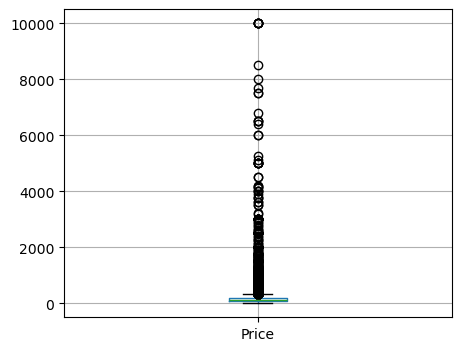

In [55]:
plt.figure(figsize=[5,4])
df.boxplot(column=['Price'])
plt.show()

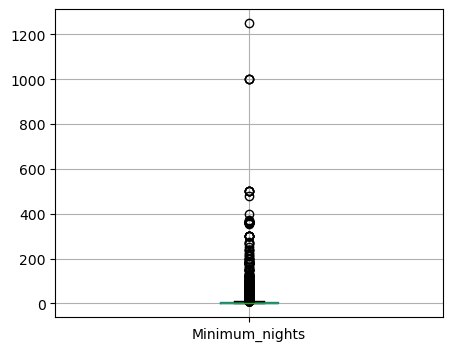

In [56]:
plt.figure(figsize=[5,4])
df.boxplot(column=['Minimum_nights'])
plt.show()

In [57]:
Q1=df["Minimum_nights"].describe()["25%"]
Q3=df["Minimum_nights"].describe()["75%"]
IQR= Q3-Q1
LOWER_BOUND=Q1-1.5*IQR
UPPER_BOUND= Q3+1.5*IQR
df_no_outliers = df[(df['Minimum_nights'] >= UPPER_BOUND)]
UPPER_BOUND= Q3+1.5*IQR
df["Minimum_nights"]=np.where(df["Minimum_nights"]>UPPER_BOUND,UPPER_BOUND,df["Minimum_nights"])

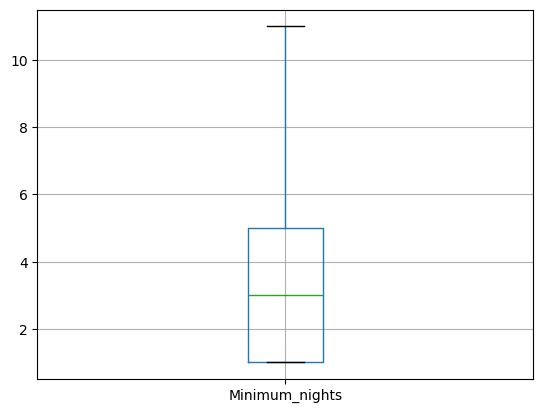

In [58]:
df.boxplot(column=['Minimum_nights'])
plt.show()

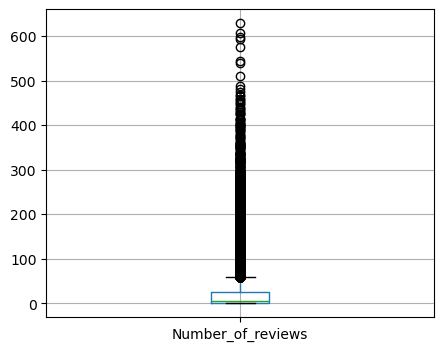

In [59]:
plt.figure(figsize=[5,4])
df.boxplot(column=['Number_of_reviews'])
plt.show()

In [60]:
df.describe() #checking again

,Id,Host_id,Latitude,Longitude,Price,Minimum_nights,Number_of_reviews,Reviews_per_month,Calculated_host_listings_count
count,4.885800e+04,4.885800e+04,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000
mean,1.902335e+07,6.763169e+07,40.728941,-73.952170,152.740309,3.826006,23.273098,1.095233,7.148369
std,1.098289e+07,7.862389e+07,0.054528,0.046159,240.232386,3.320957,44.549898,1.594481,32.964600
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000
25%,9.475980e+06,7.818669e+06,40.690090,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000
50%,1.969114e+07,3.079133e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000
75%,2.915765e+07,1.074344e+08,40.763107,-73.936280,175.000000,5.000000,24.000000,1.580000,2.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,11.000000,629.000000,58.500000,327.000000


#### visualising

In [62]:
room_type_count=df.Room_type.value_counts()
room_type_count

Room_type
Entire home/apt    25393
Private room       22306
Shared room         1159
Name: count, dtype: int64

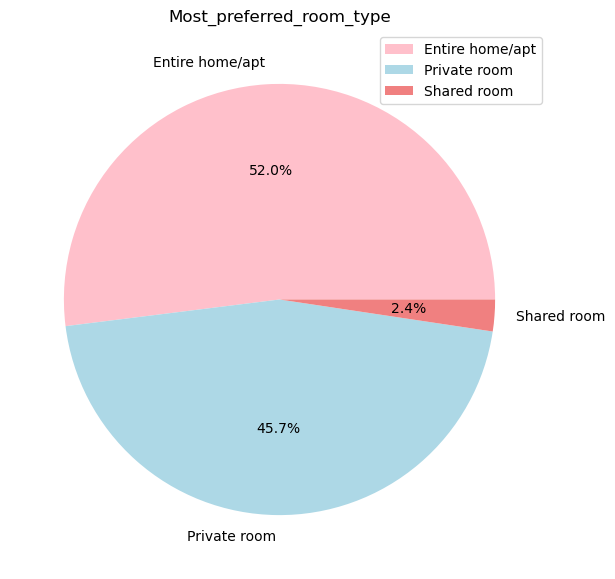

In [63]:
plt.figure(figsize=[7,7])
colors=['pink', 'lightblue', 'lightcoral']
plt.pie(x=df.Room_type.value_counts(normalize=True)*100,labels=df.Room_type.value_counts(normalize=True).index,autopct='%1.1f%%',colors=colors)
plt.legend()
plt.title('Most_preferred_room_type')
plt.show()

* mostly people preferred entire home/apt and least prefernce was given to shared room.

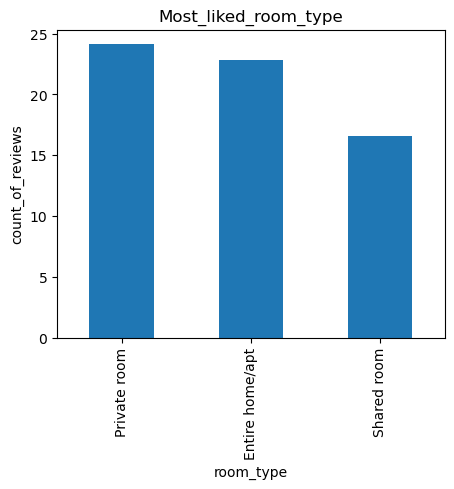

In [65]:
plt.figure(figsize=[5,4]) #bivariate analysis
df.groupby('Room_type')['Number_of_reviews'].mean().sort_values(ascending = False).plot(kind = 'bar')
plt.title("Most_liked_room_type")
plt.xlabel('room_type')
plt.ylabel('count_of_reviews')
plt.show()

* entire room was most preferred; however private room is given more ratings.
* shared rrom is less reviewed.

In [67]:
df.Neighbourhood_group.value_counts()

Neighbourhood_group
Manhattan        21643
Brooklyn         20089
Queens            5664
Bronx             1089
Staten Island      373
Name: count, dtype: int64

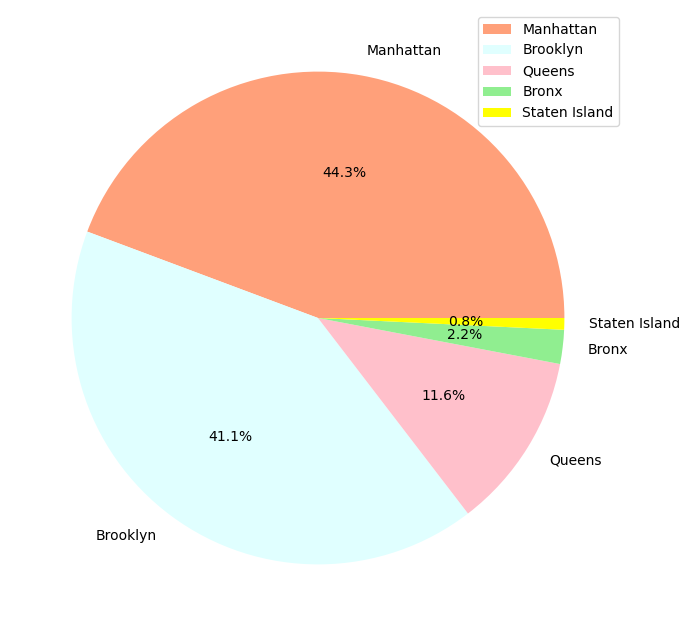

In [68]:
plt.figure(figsize=(8,8))
colors=['lightsalmon','lightcyan','pink','lightgreen','yellow']
plt.pie(x = df.Neighbourhood_group.value_counts(normalize= True) * 100,labels = df.Neighbourhood_group.value_counts(normalize= True).index,autopct='%1.1f%%',colors=colors)
plt.legend()
plt.show()

* Mostly people preferred Manhattan and brooklyn airbnb, whereas staten island and bronx are least preferred.

In [70]:
price_count=df.Price.value_counts()
price_count

Price
100    2048
150    2046
50     1531
60     1458
200    1400
       ... 
780       1
386       1
888       1
483       1
338       1
Name: count, Length: 674, dtype: int64

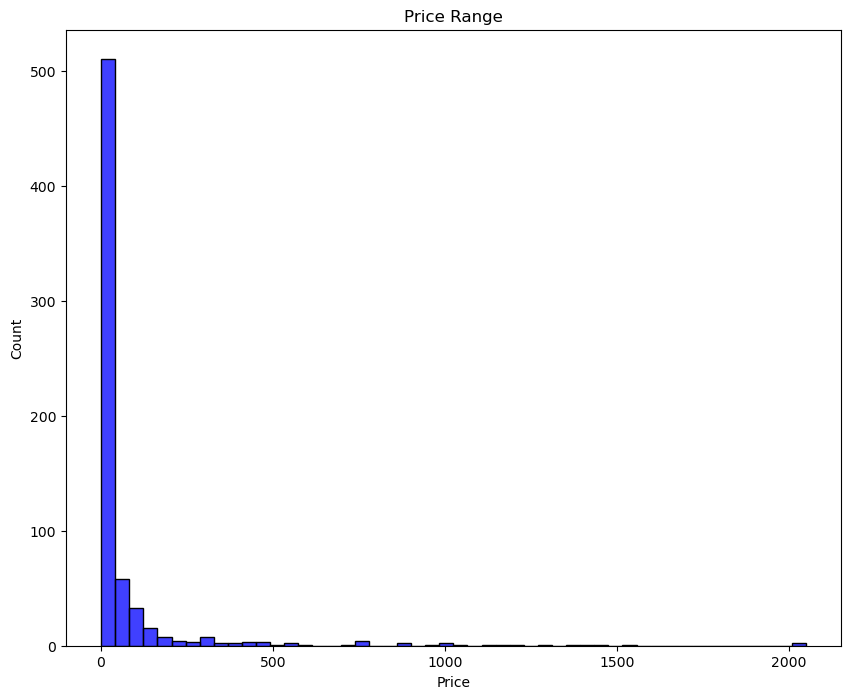

In [71]:
plt.figure(figsize=[10,8])
sns.histplot(df,x=price_count,bins=50, color='blue')
plt.title('Price Range')
plt.xlabel("Price")
plt.show()

* Most of the people preferred price less than 500, while few gave preference to accomodation whoch costed 2000.

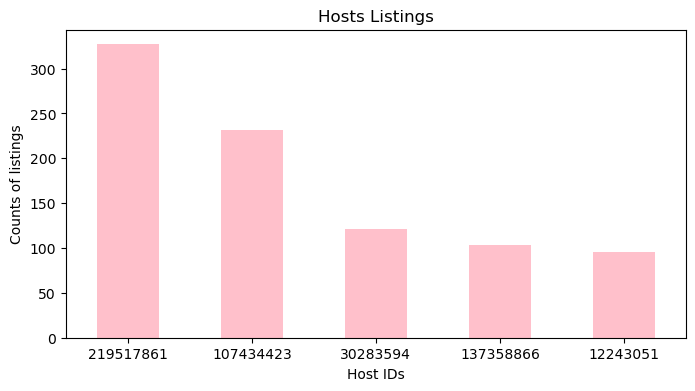

In [73]:
plt.figure(figsize=[8,4])
df.groupby('Host_id')['Host_id'].value_counts().sort_values(ascending = False).head().plot(kind = 'bar',color= 'pink')
plt.title('Hosts Listings')
plt.xlabel('Host IDs')
plt.ylabel('Counts of listings')
plt.xticks(rotation = 0)
plt.show()

* The host with host_id 219517861 has maximum hostings, followed by host_id 107434423
* Not much difference is seen in the hostings of host_id - 30283594, 137358866, 12243051

In [75]:
df_name= df[df['Host_id']== 219517861]['Name'].iloc[0]
df_name

'Sonder | 180 Water | Incredible 2BR + Rooftop'

In [76]:
top_host_names = df['Host_name'].value_counts().nlargest(30).index
top_host_names

Index(['Michael', 'David', 'Sonder (NYC)', 'John', 'Alex', 'Blueground',
       'Sarah', 'Daniel', 'Jessica', 'Maria', 'Mike', 'Andrew', 'Anna',
       'Chris', 'Laura', 'Melissa', 'Emily', 'Jennifer', 'James', 'Rachel',
       'Kara', 'Amy', 'Jonathan', 'Jason', 'Michelle', 'Brian', 'Mark', 'Adam',
       'Ben', 'Anthony'],
      dtype='object', name='Host_name')

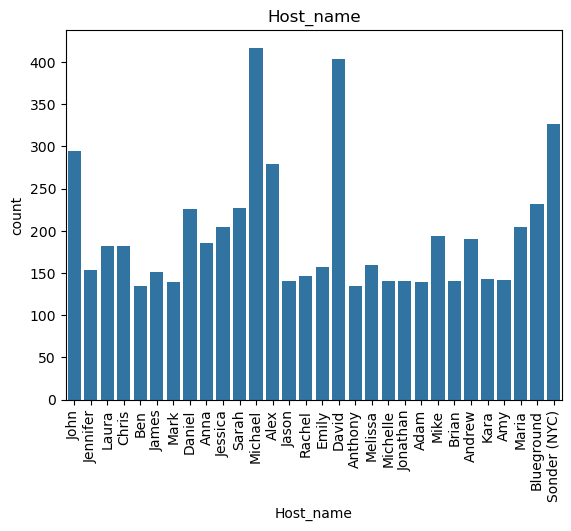

In [77]:
#plt.figure(figsize=[16,15])
sns.countplot(data=df[df['Host_name'].isin(top_host_names)], x='Host_name')
plt.title('Host_name')
plt.xticks(rotation=90)
plt.show()

* Michael, David, Sonder(nyc), John  are common hosts.

In [79]:
Neighbourhood_name=df.Neighbourhood.value_counts().nlargest(10).index
Neighbourhood_name

Index(['Williamsburg', 'Bedford-Stuyvesant', 'Harlem', 'Bushwick',
       'Upper West Side', 'Hell's Kitchen', 'East Village', 'Upper East Side',
       'Crown Heights', 'Midtown'],
      dtype='object', name='Neighbourhood')

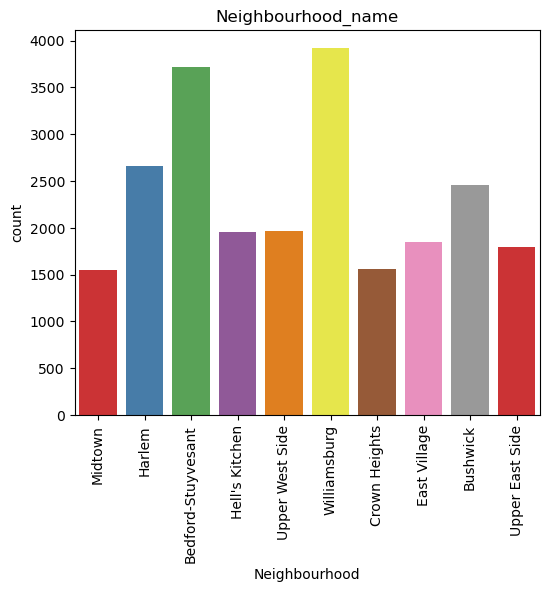

In [80]:

plt.figure(figsize=[6,5])
sns.countplot(data=df[df['Neighbourhood'].isin(Neighbourhood_name)], x='Neighbourhood', palette= 'Set1')
plt.title('Neighbourhood_name')
plt.xticks(rotation=90)
plt.show()

* Most popular neighbourhood is williamsburg and bedford-stuyvesant.
* People also preferred Harlen and bushwick.

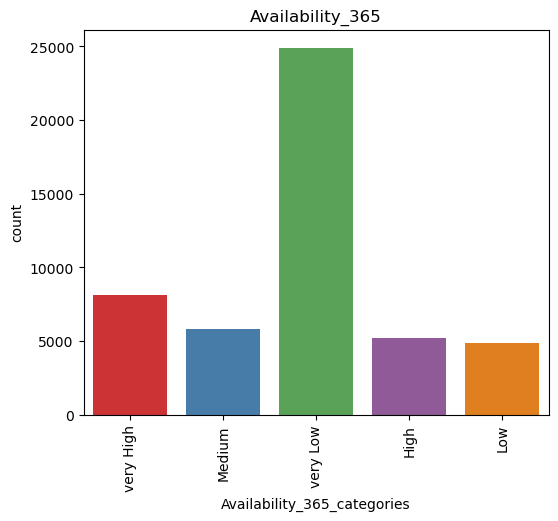

In [82]:
plt.figure(figsize=[6,5])
sns.countplot(data=df, x='Availability_365_categories', palette= 'Set1')
plt.title('Availability_365')
plt.xticks(rotation=90)
plt.show()

* The availability of most of the accomodation is very low i.e less than 50 days.

In [84]:
df.Minimum_nights.value_counts()

Minimum_nights
1.0     12700
2.0     11694
3.0      7996
11.0     6638
4.0      3297
5.0      3033
7.0      2056
6.0       752
10.0      482
8.0       130
9.0        80
Name: count, dtype: int64

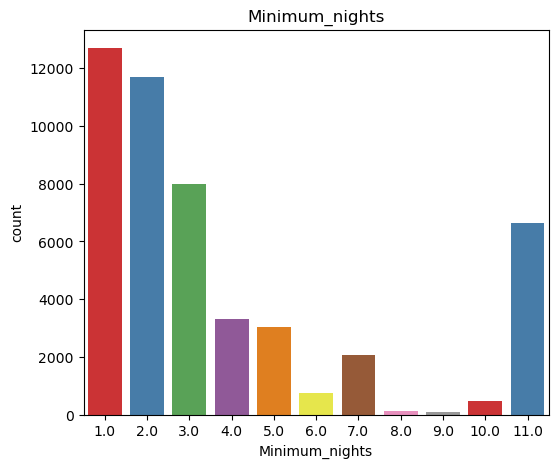

In [85]:
plt.figure(figsize=[6,5])
sns.countplot(data=df, x='Minimum_nights', palette= 'Set1')
plt.title('Minimum_nights')

plt.show()

* The minimum night stay for most of the accommodation is 1.0 , followed by 2.0 and least stay is for 8or 9 night.

#### bivariate analysis

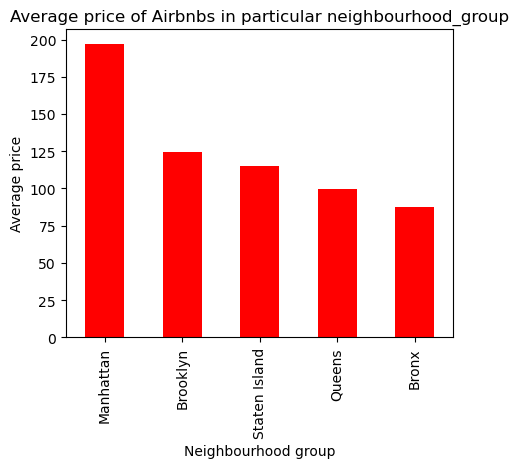

In [88]:
plt.figure(figsize=[5,4])
df.groupby('Neighbourhood_group')['Price'].mean().sort_values(ascending = False).plot(kind = 'bar', color='red')
plt.title('Average price of Airbnbs in particular neighbourhood_group')
plt.xlabel('Neighbourhood group')
plt.ylabel('Average price')
plt.xticks(rotation = 90)
plt.show()

* In manhattan,the average price of airbnb is highest.
* No significant differnce is seen in the average price of brroklyn, Staten Island, Queens and bronx.

In [90]:
df.groupby('Neighbourhood_group')['Number_of_reviews'].mean().sort_values(ascending = False)

Neighbourhood_group
Staten Island    30.941019
Queens           27.701624
Bronx            26.018365
Brooklyn         24.201006
Manhattan        20.982581
Name: Number_of_reviews, dtype: float64

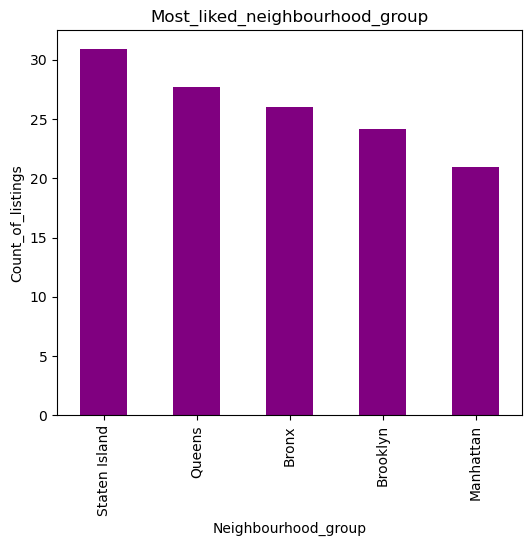

In [91]:
plt.figure(figsize=[6,5])
df.groupby('Neighbourhood_group')['Number_of_reviews'].mean().sort_values(ascending = False).plot(kind = 'bar', color='purple')
plt.title('Most_liked_neighbourhood_group')
plt.xlabel('Neighbourhood_group')
plt.ylabel('Count_of_listings')
plt.xticks(rotation = 90)
plt.show()

* Manhattan was most preferred; however most reviewed is staten island.
* Manhattan on the other hand was least reviewed it might need some adjustments. One possible reason could be high average prices in Manhattan.

In [93]:
df.groupby('Host_name')['Calculated_host_listings_count'].mean()

Host_name
#NAME?                      1.000000
'Cil                        1.000000
(Ari) HENRY LEE             1.000000
(Email hidden by Airbnb)    1.333333
(Mary) Haiy                 1.000000
                              ...   
단비                          1.000000
빈나                          1.000000
소정                          1.000000
진                           1.000000
현선                          1.000000
Name: Calculated_host_listings_count, Length: 11450, dtype: float64

In [94]:
#since we have so many entries so using .head() to plot top 10

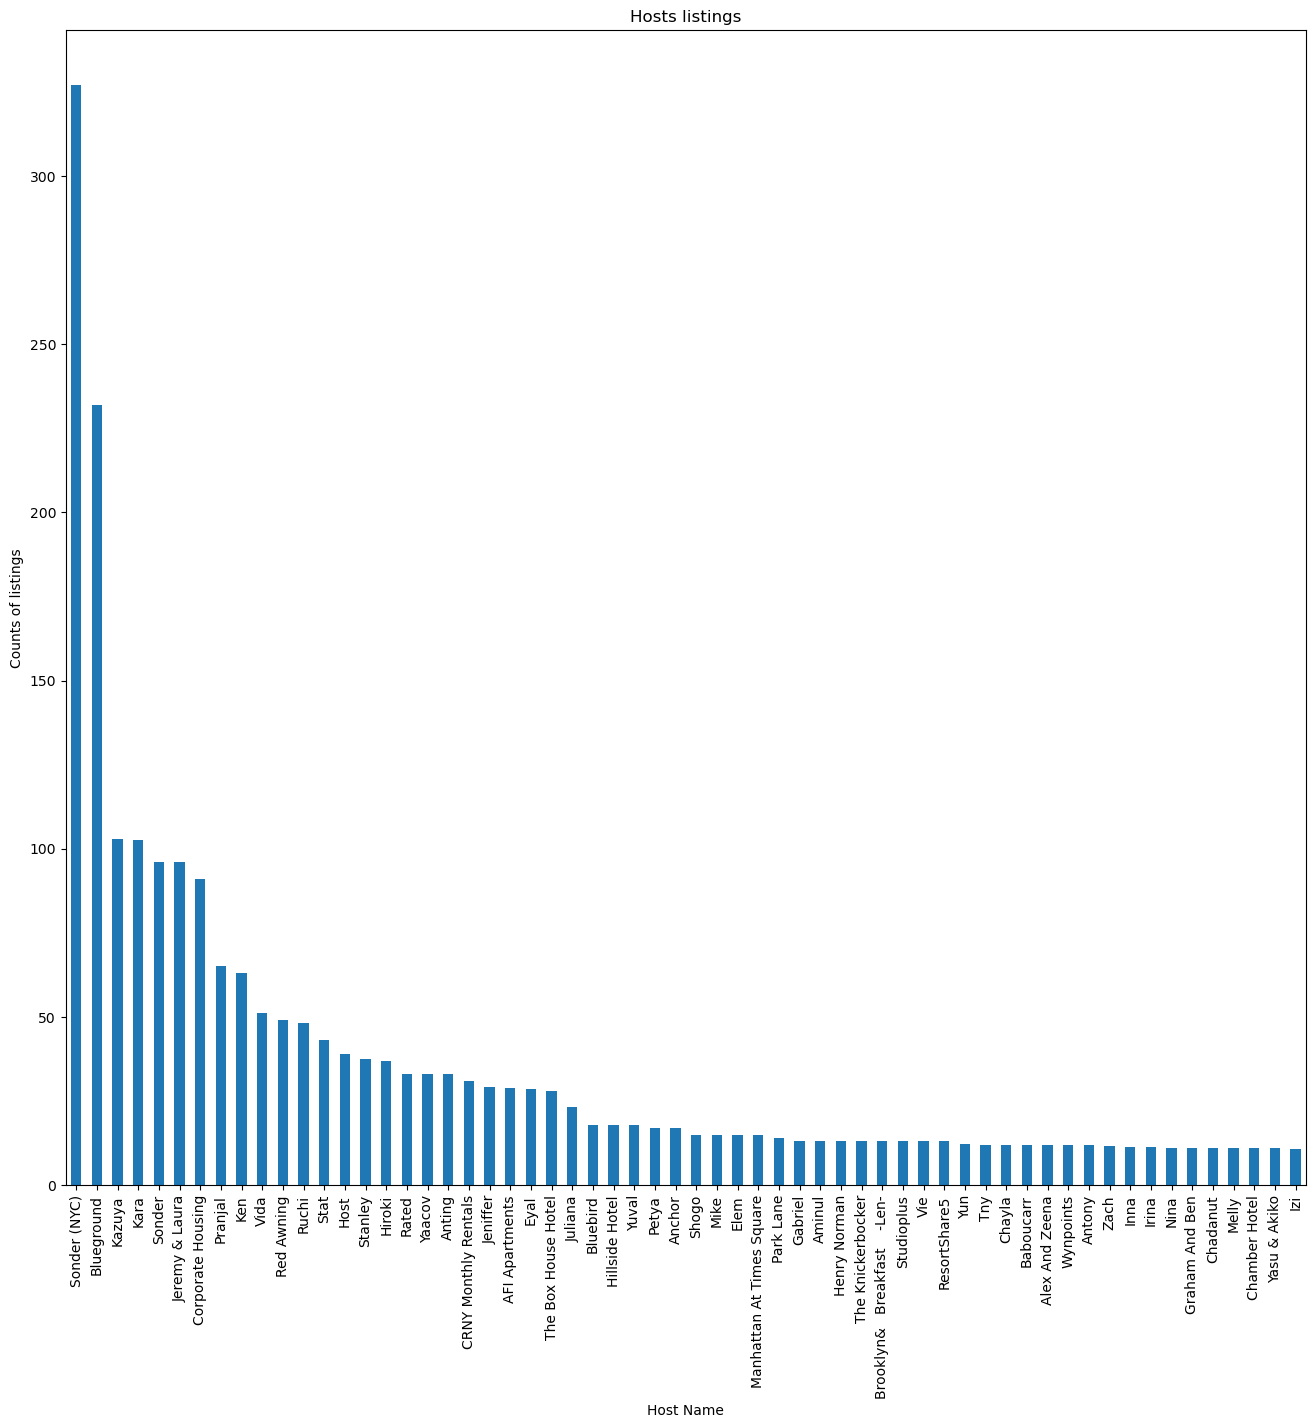

In [95]:
plt.figure(figsize=[16,15])
df.groupby('Host_name')['Calculated_host_listings_count'].mean().sort_values(ascending = False).head(60).plot(kind = 'bar')
plt.title('Hosts listings')
plt.xlabel('Host Name')
plt.ylabel('Counts of listings') 
plt.xticks(rotation = 90)
plt.show()

* Sonder(Nyc) has the most listings,followed by blueground,while kazuya, kara have almost same listings.
* Sonder, Jeremy & Laura , Corporate housing also have good number of hostings.

#### The various kinds of properties that exist w.r.t. customer preferences.

* MULTIVARIATE ANALYSIS

In [99]:
df['Host_name'].isna().sum()

0

In [100]:
df['Host_name'].value_counts()

Host_name
Michael            417
David              403
Sonder (NYC)       327
John               294
Alex               279
                  ... 
Femi & Toya          1
Nirit (Nina)         1
Louise & Thomas      1
Maneto               1
Ilgar & Aysel        1
Name: count, Length: 11450, dtype: int64

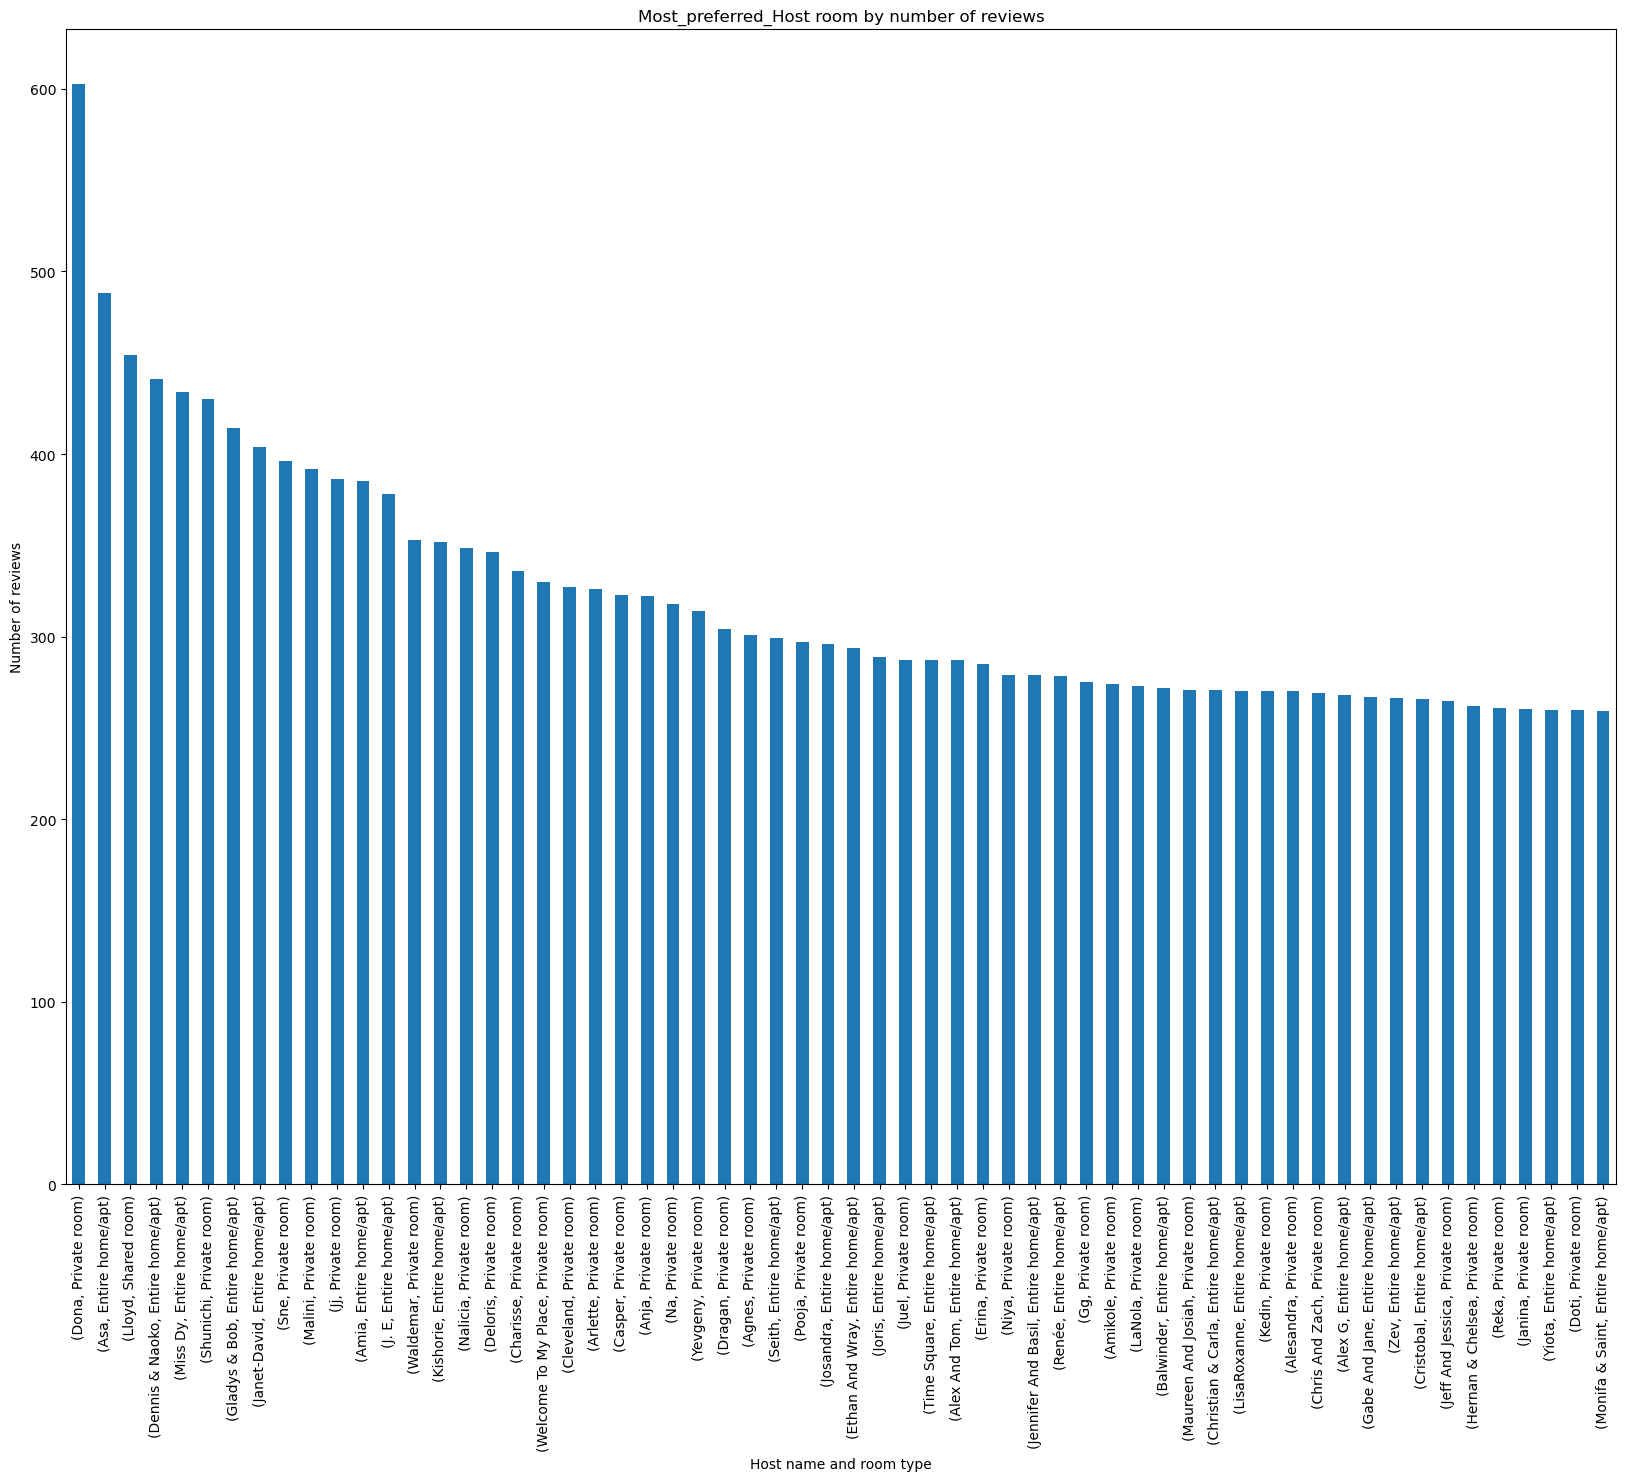

In [101]:
plt.figure(figsize=[20,15])
df.groupby(['Host_name','Room_type'])['Number_of_reviews'].mean().sort_values(ascending = False).head(60).plot(kind = 'bar')
plt.title('Most_preferred_Host room by number of reviews')
plt.xlabel('Host name and room type')
plt.ylabel('Number of reviews')
plt.xticks(rotation = 90)
plt.show()

* Dona's private room is most reviewed by customers.
* Asa entire home/apt and lloyd's shared room are also given more reviews.
* All the 60 hosts and theri hostings are of gre4at importance for airbnb.

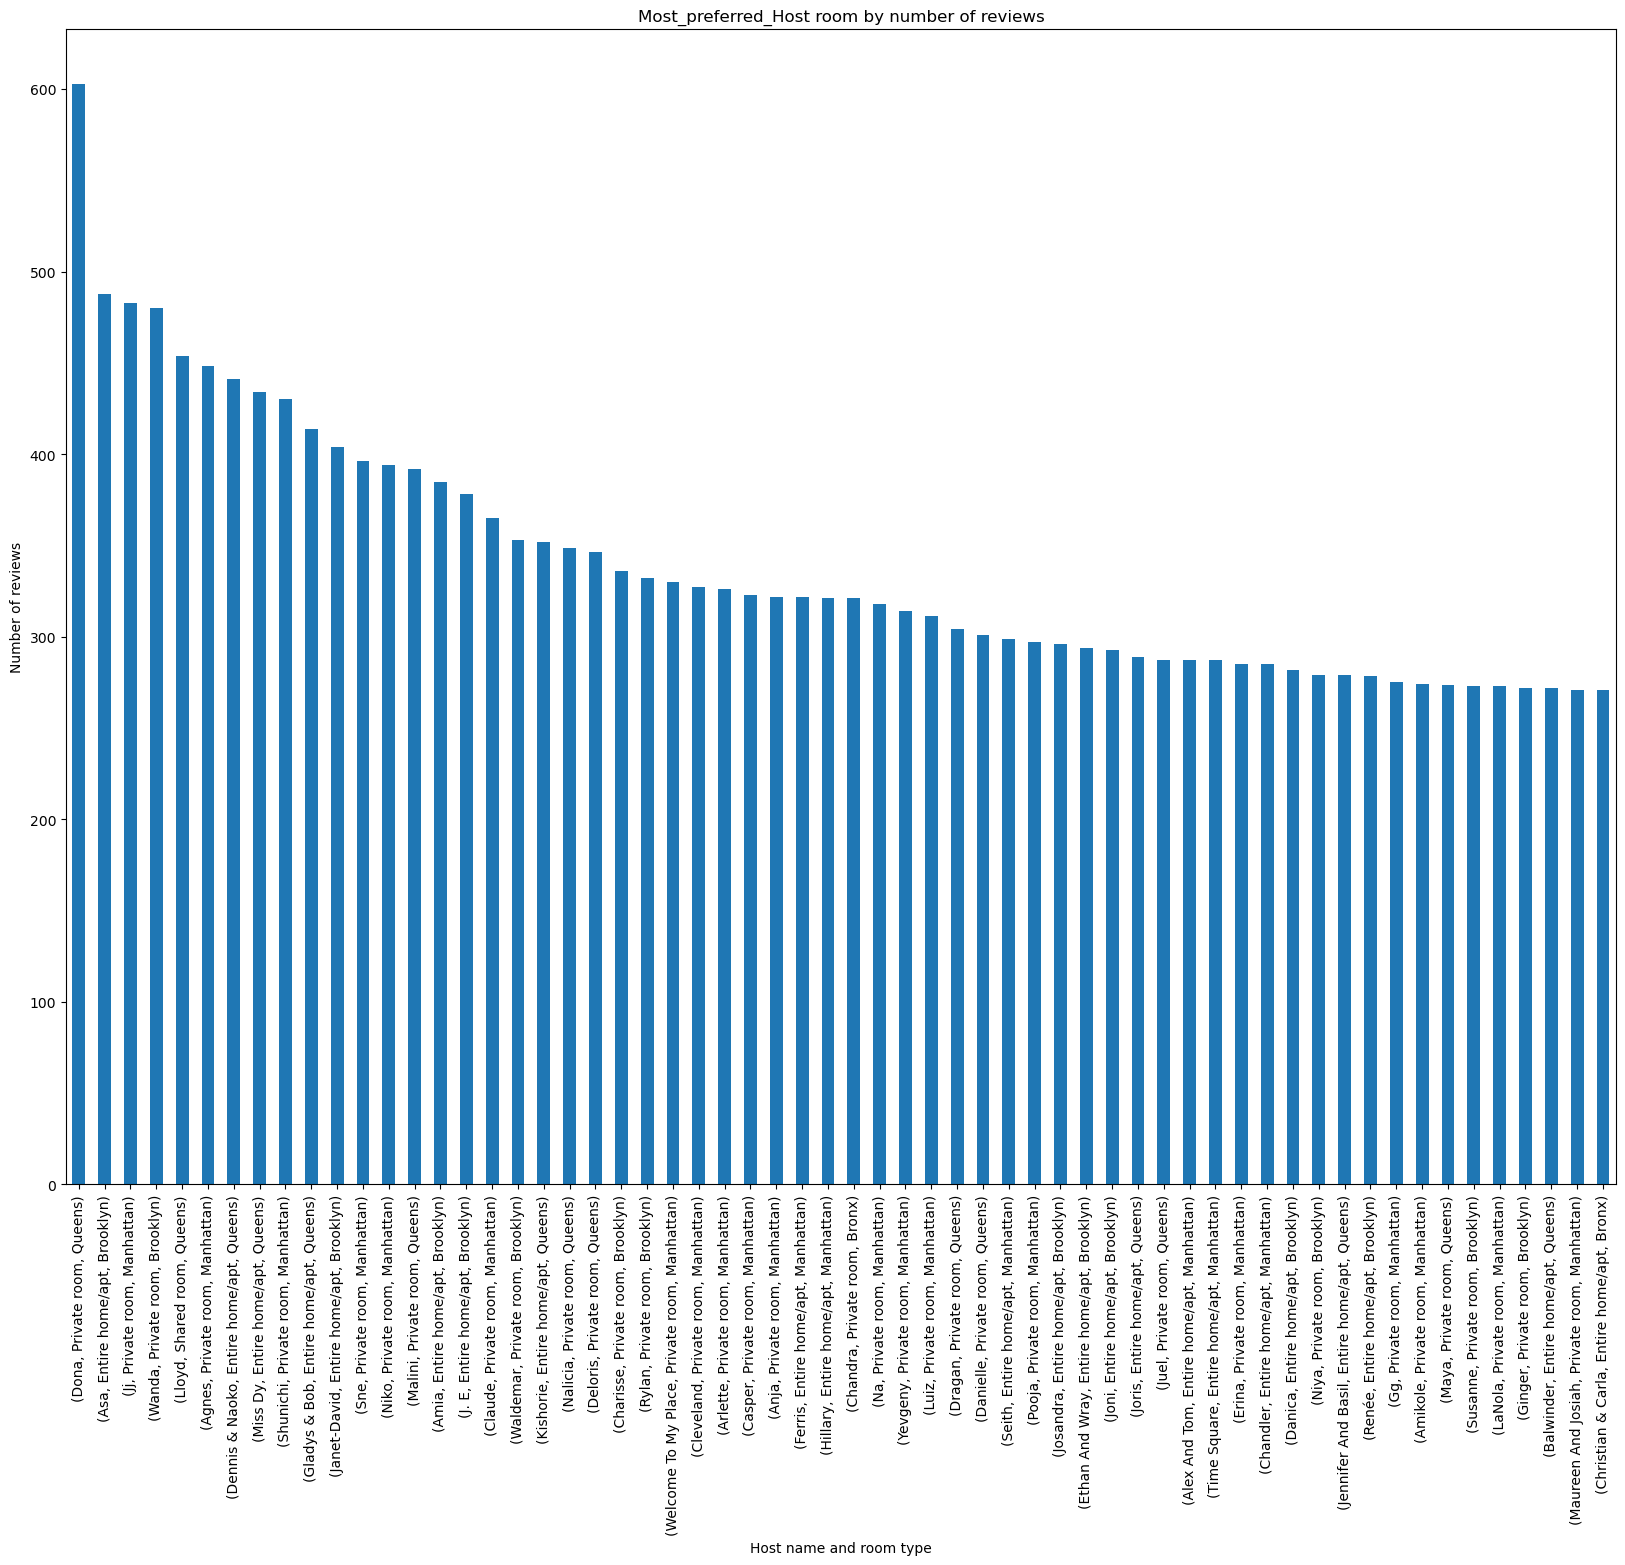

In [178]:
plt.figure(figsize=[20,15])
df.groupby(['Host_name','Room_type','Neighbourhood_group'])['Number_of_reviews'].mean().sort_values(ascending = False).head(60).plot(kind = 'bar')
plt.title('Most_preferred_Host room by number of reviews')
plt.xlabel('Host name and room type')
plt.ylabel('Number of reviews')
plt.xticks(rotation = 90)
plt.show()

* Dona's private room in queens is most reviewed while the no of reviews for others are also significant.
* Airbnb should focus on these hosts and their hostings in the re4spective neighbourhood.

In [181]:
top_property = df[(df['Room_type'] == 'Private room') & (df['Neighbourhood_group'] == 'Queens')]
# Get the price and minimum nights for this property
top_property_info = top_property[['Price', 'Minimum_nights']].head(1)
print(top_property_info)


    Price  Minimum_nights
46    130             3.0


* DONA'S PRIVATE ROOM IN QUEENS COSTS ONLY  130 PER NIGHT AND MINIMUM NIGHT STAY IS 3 WHICH COSTS 390. The price is quite lower and this can be the reason why it is more reviewed.

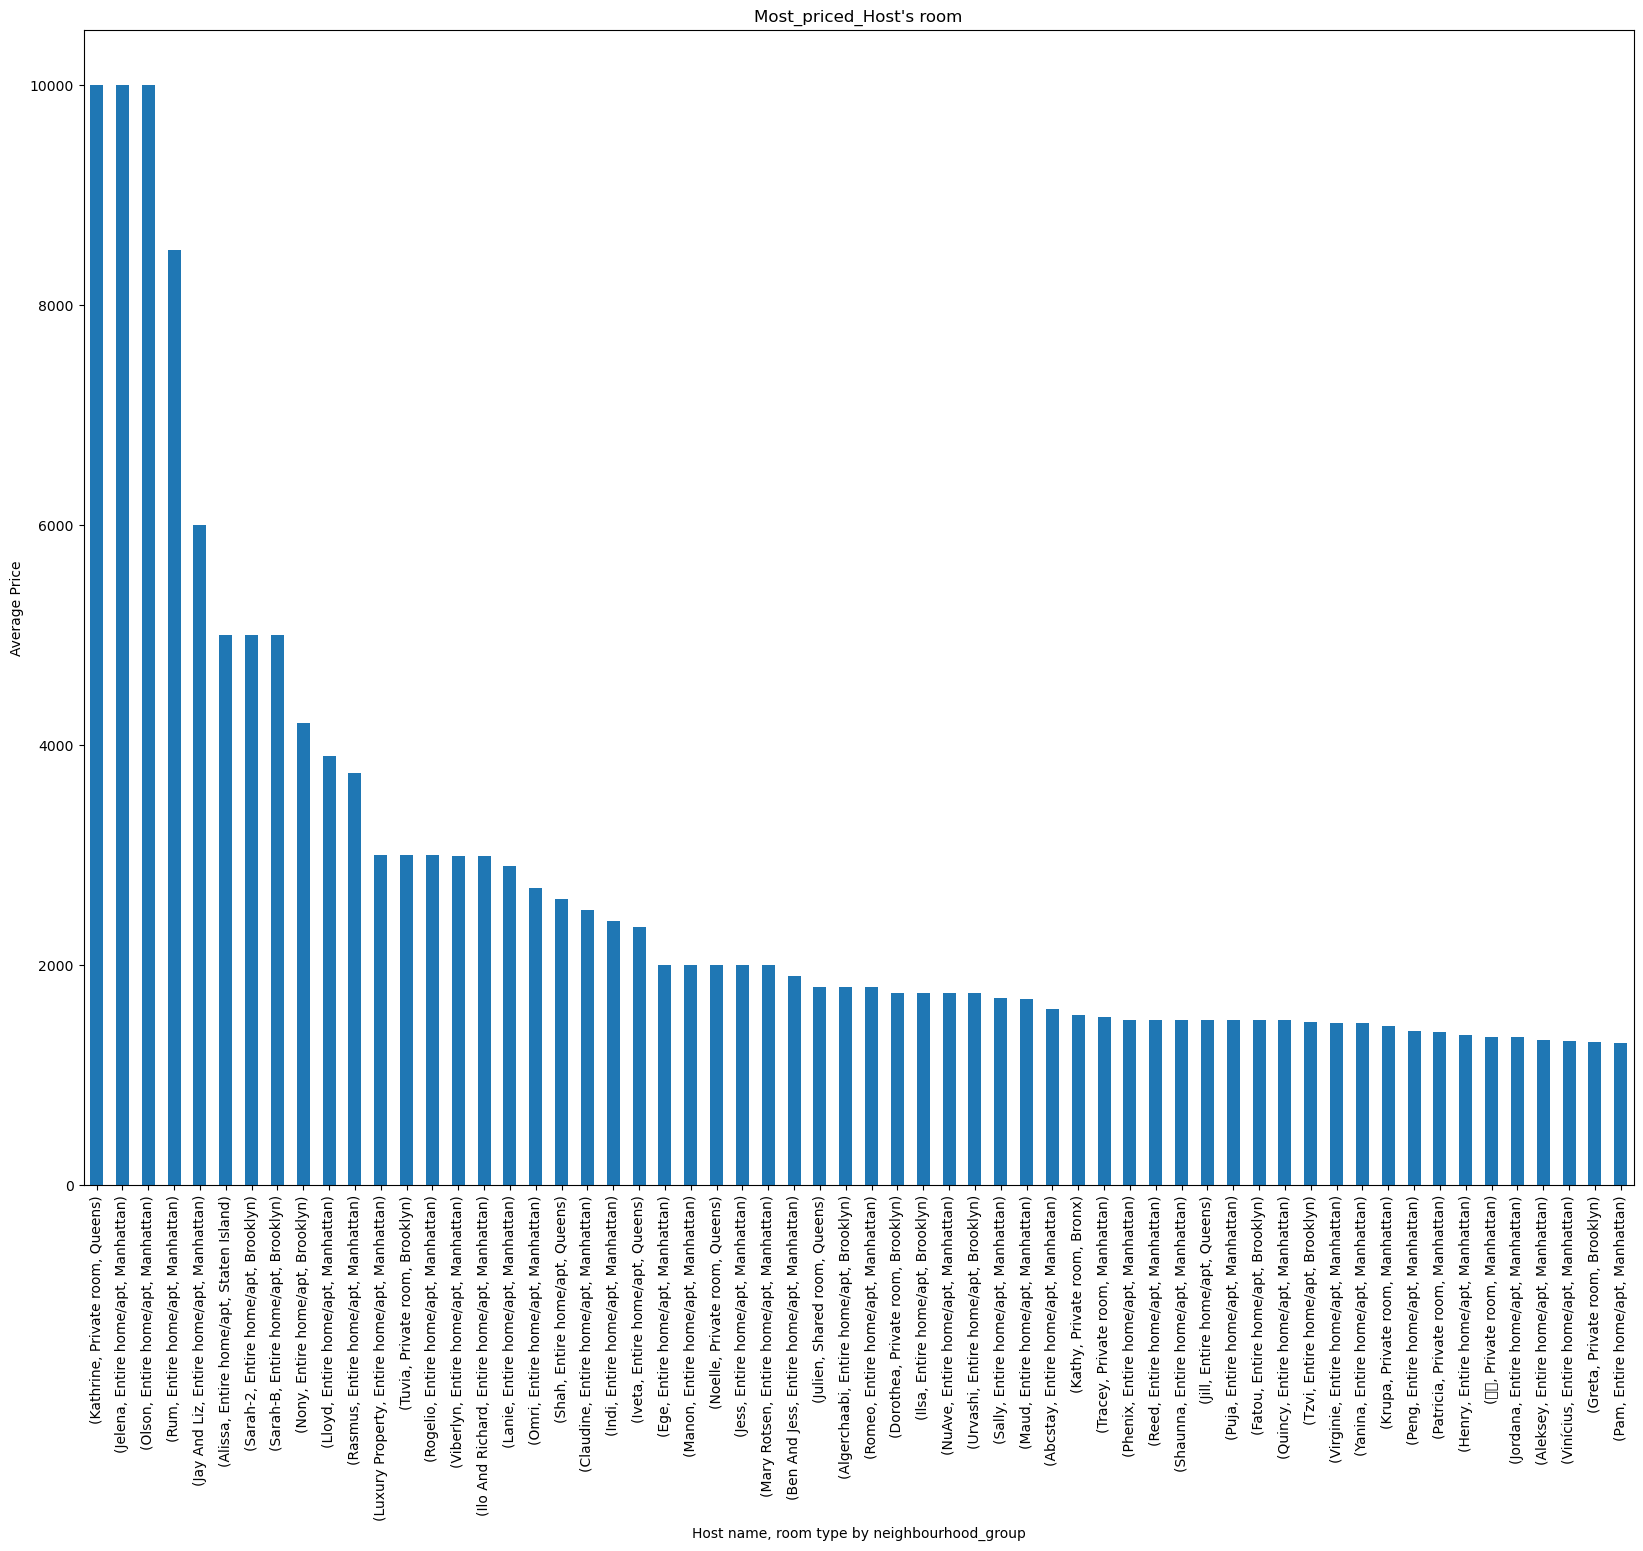

In [184]:
plt.figure(figsize=[20,15])
df.groupby(['Host_name','Room_type','Neighbourhood_group'])['Price'].mean().sort_values(ascending = False).head(60).plot(kind = 'bar')
plt.title('Most_priced_Host\'s room')
plt.xlabel('Host name, room type by neighbourhood_group')
plt.ylabel('Average Price')
plt.xticks(rotation = 90)
plt.show()

* The average price of kathrine's private room in queens, jelena's entire room/apt in manhattan , olson's entire room/apt in manhattan, run's entire room/apt in manhattan is high more than 1000 which suggests that this properties might be luxurious. These high prices might be the reasons that these properties are not reviewed much.

###### lets check minimum_nights

In [192]:
# Filter for "Private room" in "Queens" and Host_name "Kathrine"
top_property = df[(df['Room_type'] == 'Private room') & 
                  (df['Neighbourhood_group'] == 'Queens') & 
                  (df['Host_name'] == 'Kathrine')]

# Get the price and minimum nights for this property
top_property_info = top_property ['Minimum_nights'].head(1)

print(top_property_info)


9151    11.0
Name: Minimum_nights, dtype: float64


In [194]:
top_property = df[(df['Room_type'] == 'Entire home/apt') & 
                  (df['Neighbourhood_group'] == 'Manhattan') & 
                  (df['Host_name'] == 'Jelena')]

# Get the price and minimum nights for this property
top_property_info = top_property['Minimum_nights'].head(1)

print(top_property_info)


29238    11.0
Name: Minimum_nights, dtype: float64


In [196]:
top_property = df[(df['Room_type'] == 'Entire home/apt') & 
                  (df['Neighbourhood_group'] == 'Manhattan') & 
                  (df['Host_name'] == 'Olson')]

# Get the price and minimum nights for this property
top_property_info = top_property['Minimum_nights'].head(1)

print(top_property_info)

6530    5.0
Name: Minimum_nights, dtype: float64


In [198]:
top_property = df[(df['Room_type'] == 'Entire home/apt') & 
                  (df['Neighbourhood_group'] == 'Manhattan') & 
                  (df['Host_name'] == 'Rum')]

# Get the price and minimum nights for this property
top_property_info = top_property['Minimum_nights'].head(1)

print(top_property_info)

30268    11.0
Name: Minimum_nights, dtype: float64


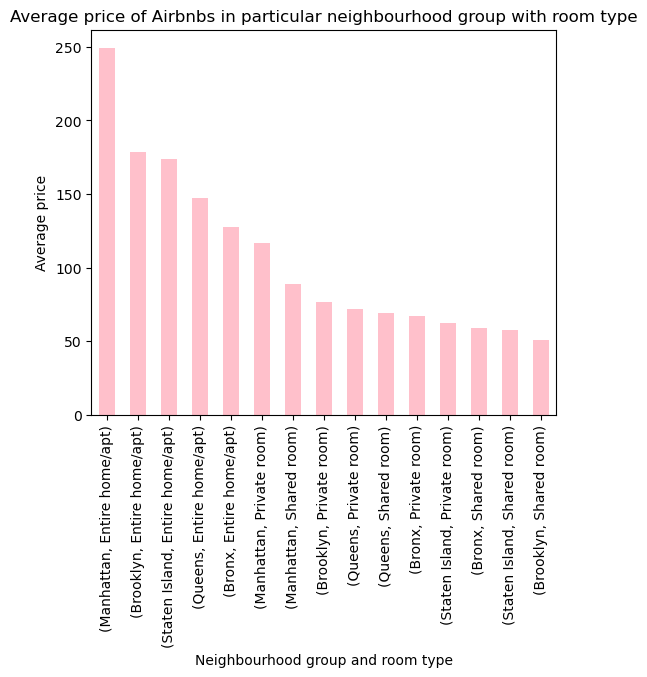

In [200]:
plt.figure(figsize=[6,5])
df.groupby(['Neighbourhood_group','Room_type'])['Price'].mean().sort_values(ascending = False).plot(kind = 'bar',color='pink')
plt.title('Average price of Airbnbs in particular neighbourhood group with room type')
plt.xlabel('Neighbourhood group and room type')
plt.ylabel('Average price')
plt.xticks(rotation = 90)
plt.show()

* Average price in mahattan and brooklyn for entire home/apt is higher than others. this might be the reason why manhattan is less reviewed.
* The average price of staten island for all host type except entire home/apt is good.
* Brooklyn shared room is less reviewed.

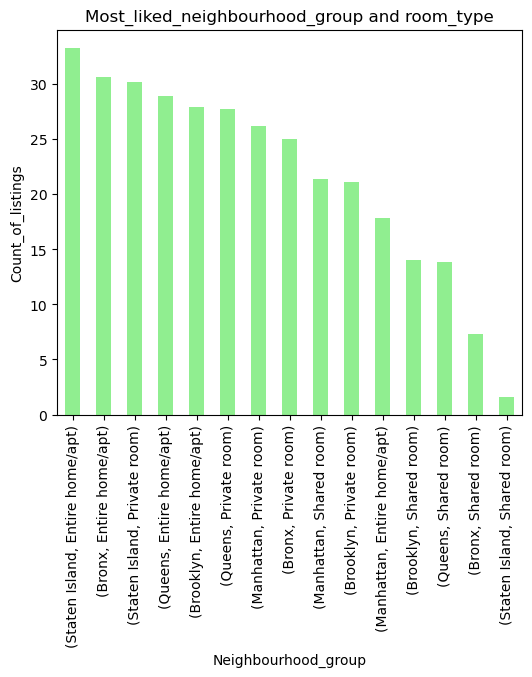

In [203]:

plt.figure(figsize=[6,5])
df.groupby(['Neighbourhood_group','Room_type'])['Number_of_reviews'].mean().sort_values(ascending = False).plot(kind = 'bar', color='lightgreen')
plt.title('Most_liked_neighbourhood_group and room_type')
plt.xlabel('Neighbourhood_group')
plt.ylabel('Count_of_listings')
plt.xticks(rotation = 90)
plt.show()

* People reviewed staten island's entire home/apt more, while staten island shared room is less reviewd.

* The one possible reason again could be price and minimum night stay. the overall cost for this place is 450 for 6 nights which is fair enough.

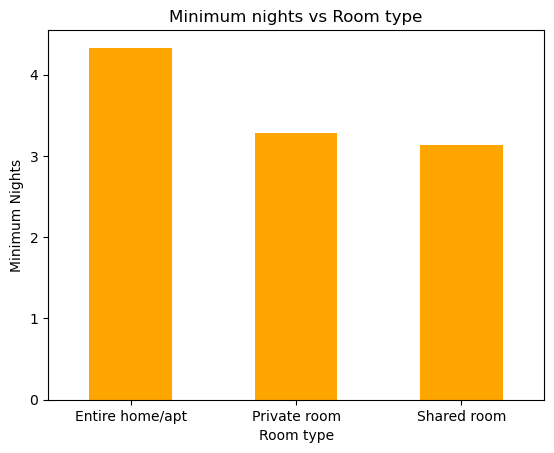

In [211]:
df.groupby('Room_type')['Minimum_nights'].mean().sort_values(ascending = False).plot(kind = 'bar',color='orange')
plt.title('Minimum nights vs Room type')
plt.xlabel('Room type')
plt.ylabel('Minimum Nights')
plt.xticks(rotation = 0)
plt.show()


* The count of minimum nights is higher for entire home/apt and less for shared room.

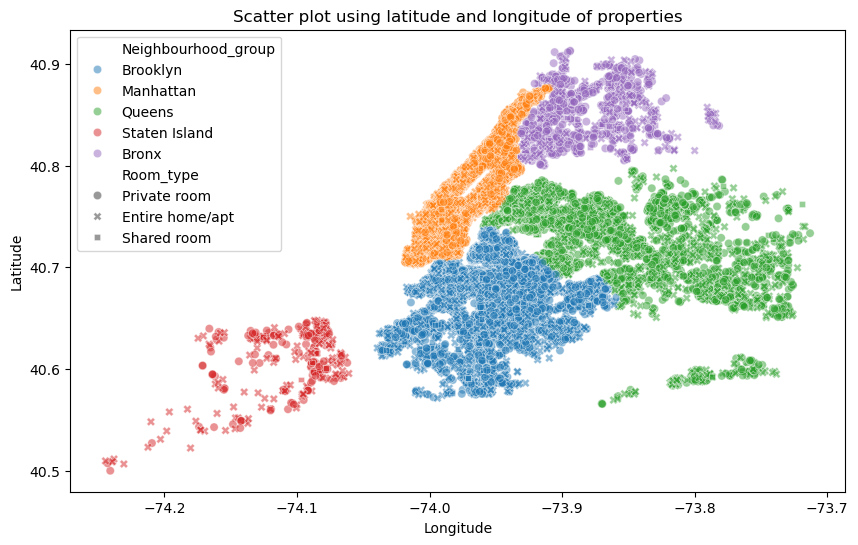

In [204]:
plt.figure(figsize=[10,6])
sns.scatterplot(x = df['Longitude'], y = df['Latitude'], hue = df['Neighbourhood_group'], alpha = 0.5, style = df['Room_type'])
plt.title('Scatter plot using latitude and longitude of properties')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()


* Most of the property exist in Manhattan and Brooklyn